In [1]:
#conda install -c conda-forge cartopy

In [103]:
### Important libries to import
import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from descartes import PolygonPatch
import matplotlib.path as mplPath
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask

In [104]:
RH = xr.open_dataset('C:/Dinis_MOZ/RH_monmean.nc')
#RH
RH.data_vars

Data variables:
    r        (time, latitude, longitude) float64 ...

In [106]:
Rh_mon=RH.sel(time='2019-01-01')
#Rh_mon

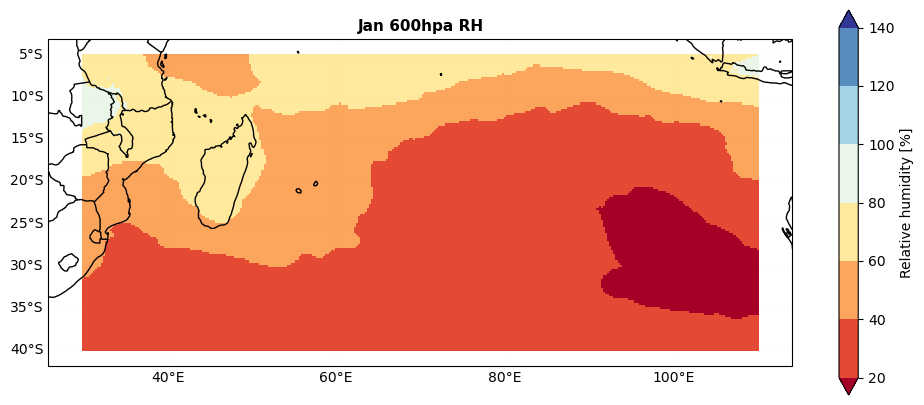

In [64]:
#PLOTING FOR 1 SINGLE MONTHS
fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

RH['r'].sel(time='2019-01-01').plot(ax=ax, cmap=plt.cm.RdYlBu,levels=np.arange(20, 160, 20),extend='both',
                   transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.title('Jan 600hpa RH',fontsize=11, fontweight='bold')
#plt.savefig('C:/ERSSTv5/output/V wind component diff.png')
plt.show()

In [65]:
sf2 = shp.Reader('D://Folder_2023//GIS_DATA//Oceans_disolved//Oceans_dissolved.shp')

In [66]:
## Plot panel maps
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import numpy as np

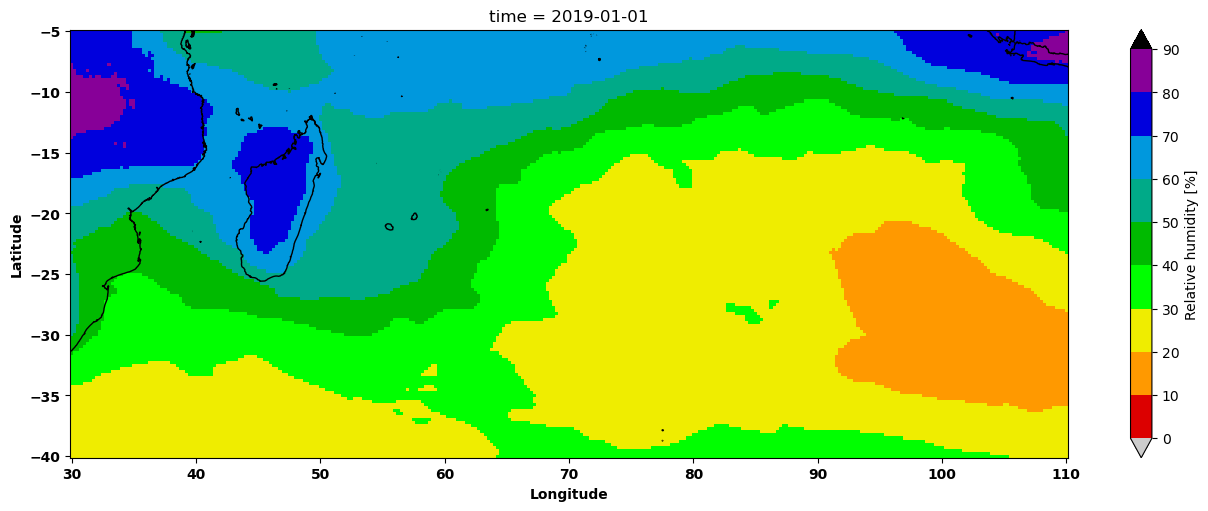

In [82]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(12,5))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    Rh_mon.r.plot(cmap=plt.cm.nipy_spectral_r,extend='both',levels=np.arange(0, 100, 10))
    plt.ylabel('Latitude',fontsize=10, fontweight='bold')
    plt.xlabel('Longitude',fontsize=10, fontweight='bold')
    #plt.title('Rainfall on 27th April',fontsize=12, fontweight='bold')
    plt.xticks(size = 10, fontweight='bold')
    plt.yticks(size = 10, fontweight='bold')
    #plt.savefig("D:/Folder_2023/Research/Joan/RFE_April 27.png")
    plt.show()

In [83]:
## Plot panel maps
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import numpy as np

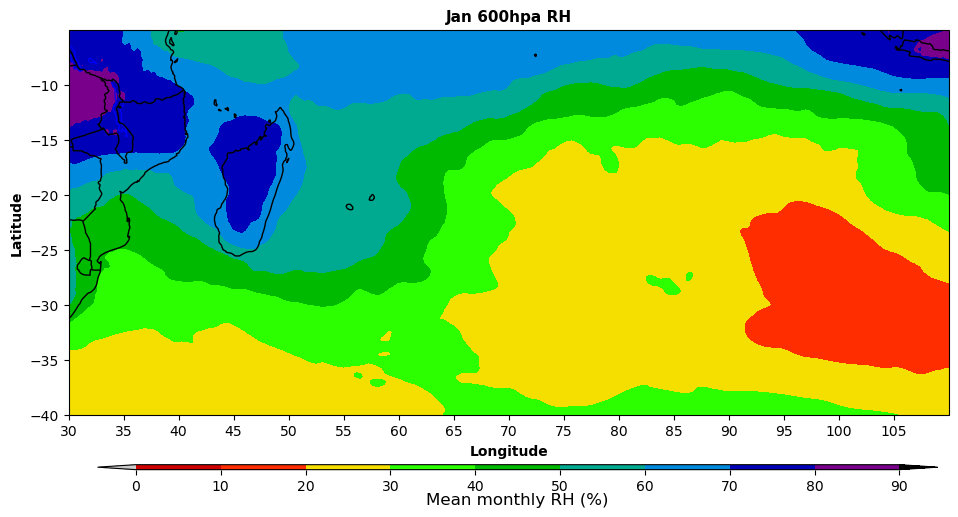

In [100]:
fig = plt.figure(figsize=(12,5))
proj = ccrs.PlateCarree(central_longitude=0)

## Plot 1
ax = plt.subplot( projection=proj)
ax.add_feature(cfeat.BORDERS, linestyle='solid',linewidth=1.)
ax.add_feature(cfeat.LAKES, facecolor='none', edgecolor='black',linewidth=1.)
ax.add_feature(cfeat.COASTLINE,linewidth=1.)

cs = plt.contourf(Rh_mon.longitude, Rh_mon.latitude, Rh_mon.r, cmap=plt.cm.nipy_spectral_r, levels=np.arange(0, 100, 10), extend='both')
ax.set_xticks(range(30, 110, 5), crs=ccrs.PlateCarree(central_longitude=0))
ax.set_yticks(range(-40, -5, 5), crs=ccrs.PlateCarree(central_longitude=0))
lakes_50m = cfeat.NaturalEarthFeature('physical', 'lakes', '50m',edgecolor='k',facecolor='none')
coastline_50m = cfeat.NaturalEarthFeature('physical', 'coastline', '50m',edgecolor='k',facecolor='none')
ax.add_feature(lakes_50m, edgecolor='blue',facecolor='none',linewidth=0.8)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
plt.title('Jan 600hpa RH',fontsize=11, fontweight='bold')
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
cax = fig.add_axes([0.17, 0.0001, 0.7, 0.01])   ## [left, bottom, width, height]
cb = plt.colorbar(cs, cax, orientation='horizontal', extend = 'both')
#cb.set_label('mm season$^{-1}$', fontsize = 12, labelpad = -1)
cb.set_label('Mean monthly RH (%)', fontsize = 12, labelpad = -1)
plt.savefig("C:/Dinis_MOZ/Jan_clim.png")
plt.show()